In [1]:
import os , shutil
base_dir = "/home/shayan/Conda files/Deep learning/CNN cats vs dogs/"
original_dataset_dir = "/home/shayan/Conda files/Deep learning/Data"

In [2]:
train_dir= os.path.join(base_dir,'train')
# os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')
# os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
# os.mkdir(test_dir)

In [3]:
train_cats_dir = os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)

validation_cats_dir=os.path.join(validation_dir,'cats')
# os.mkdir(validation_cats_dir)

test_cats_dir = os.path.join(test_dir,'cat')
# os.mkdir(test_cats_dir)


In [4]:
train_dogs_dir = os.path.join(train_dir,'dogs')
# os.mkdir(train_dogs_dir)

validation_dogs_dir=os.path.join(validation_dir,'dogs')
# os.mkdir(validation_dogs_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
# os.mkdir(test_dogs_dir)


In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [5]:
print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total test cat images:',len(os.listdir(test_cats_dir)))
print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)))
print('total test dog images:',len(os.listdir(test_dogs_dir)))
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total test cat images: 500
total validation cat images: 500
total training dog images: 1000
total test dog images: 500
total validation dog images: 500


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [8]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch sahpe:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch sahpe: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 64s 639ms/step - loss: 0.6892 - acc: 0.5280 - val_loss: 0.6818 - val_acc: 0.5230
Epoch 2/30
100/100 [==============================] - 58s 580ms/step - loss: 0.6623 - acc: 0.6070 - val_loss: 0.6704 - val_acc: 0.5760
Epoch 3/30
100/100 [==============================] - 56s 563ms/step - loss: 0.6189 - acc: 0.6635 - val_loss: 0.6205 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 57s 570ms/step - loss: 0.5751 - acc: 0.6950 - val_loss: 0.6179 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 57s 570ms/step - loss: 0.5455 - acc: 0.7200 - val_loss: 0.6058 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 62s 616ms/step - loss: 0.5191 - acc: 0.7415 - val_loss: 0.5797 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 57s 572ms/step - loss: 0.4886 - acc: 0.7580 - val_loss: 0.53

In [12]:
model.save('/home/shayan/Conda files/models/cats_and_dogs_small_1.h5')

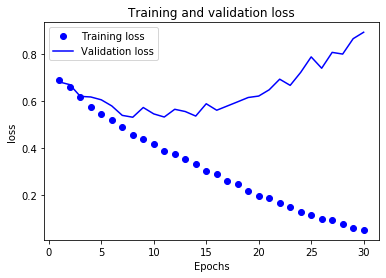

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
[u'acc', u'loss' , u'val_acc', u'val_loss']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs= range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo' , label='Training loss')
plt.plot(epochs, val_loss_values, 'b' , label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 62s 625ms/step - loss: 0.6936 - acc: 0.5235 - val_loss: 0.6897 - val_acc: 0.5300
Epoch 2/100
100/100 [==============================] - 62s 618ms/step - loss: 0.6901 - acc: 0.5255 - val_loss: 0.6813 - val_acc: 0.5150
Epoch 3/100
100/100 [==============================] - 60s 603ms/step - loss: 0.6822 - acc: 0.5430 - val_loss: 0.6624 - val_acc: 0.5900
Epoch 4/100
100/100 [==============================] - 62s 616ms/step - loss: 0.6773 - acc: 0.5740 - val_loss: 0.6507 - val_acc: 0.6060
Epoch 5/100
100/100 [==============================] - 66s 655ms/step - loss: 0.6669 - acc: 0.5830 - val_loss: 0.6949 - val_acc: 0.5260
Epoch 6/100
100/100 [==============================] - 66s 662ms/step - loss: 0.6515 - acc: 0.6230 - val_loss: 0.6304 - val_acc: 0.6290
Epoch 7/100
100/100 [===

100/100 [==============================] - 66s 655ms/step - loss: 0.5661 - acc: 0.7060 - val_loss: 0.5344 - val_acc: 0.7300
Epoch 18/100
100/100 [==============================] - 67s 665ms/step - loss: 0.5618 - acc: 0.7115 - val_loss: 0.6152 - val_acc: 0.6690
Epoch 19/100
100/100 [==============================] - 67s 665ms/step - loss: 0.5619 - acc: 0.7030 - val_loss: 0.5365 - val_acc: 0.7110
Epoch 20/100
100/100 [==============================] - 66s 660ms/step - loss: 0.5624 - acc: 0.6985 - val_loss: 0.5370 - val_acc: 0.7190
Epoch 21/100
100/100 [==============================] - 66s 657ms/step - loss: 0.5576 - acc: 0.7010 - val_loss: 0.5211 - val_acc: 0.7460
Epoch 22/100
100/100 [==============================] - 66s 664ms/step - loss: 0.5539 - acc: 0.7080 - val_loss: 0.5184 - val_acc: 0.7370
Epoch 23/100
100/100 [==============================] - 69s 688ms/step - loss: 0.5512 - acc: 0.7125 - val_loss: 0.5203 - val_acc: 0.7430
Epoch 24/100
100/100 [==============================] 

100/100 [==============================] - 71s 706ms/step - loss: 0.5036 - acc: 0.7545 - val_loss: 0.5158 - val_acc: 0.7240
Epoch 35/100
100/100 [==============================] - 73s 731ms/step - loss: 0.5147 - acc: 0.7415 - val_loss: 0.4986 - val_acc: 0.7530
Epoch 36/100
100/100 [==============================] - 67s 668ms/step - loss: 0.5075 - acc: 0.7495 - val_loss: 0.5162 - val_acc: 0.7470
Epoch 37/100
100/100 [==============================] - 69s 690ms/step - loss: 0.4991 - acc: 0.7610 - val_loss: 0.5356 - val_acc: 0.7250
Epoch 38/100
100/100 [==============================] - 65s 652ms/step - loss: 0.5046 - acc: 0.7550 - val_loss: 0.4928 - val_acc: 0.7540
Epoch 39/100
100/100 [==============================] - 66s 659ms/step - loss: 0.4999 - acc: 0.7545 - val_loss: 0.5040 - val_acc: 0.7430
Epoch 40/100
100/100 [==============================] - 64s 635ms/step - loss: 0.4838 - acc: 0.7710 - val_loss: 0.5074 - val_acc: 0.7500
Epoch 41/100
100/100 [==============================] 

100/100 [==============================] - 64s 640ms/step - loss: 0.4701 - acc: 0.7730 - val_loss: 0.6201 - val_acc: 0.6820
Epoch 52/100
100/100 [==============================] - 64s 642ms/step - loss: 0.4640 - acc: 0.7780 - val_loss: 0.5178 - val_acc: 0.7460
Epoch 53/100
100/100 [==============================] - 63s 625ms/step - loss: 0.4590 - acc: 0.7800 - val_loss: 0.4988 - val_acc: 0.7580
Epoch 54/100
100/100 [==============================] - 63s 627ms/step - loss: 0.4523 - acc: 0.7815 - val_loss: 0.4963 - val_acc: 0.7680
Epoch 55/100
100/100 [==============================] - 61s 614ms/step - loss: 0.4623 - acc: 0.7705 - val_loss: 0.4518 - val_acc: 0.7950
Epoch 56/100
100/100 [==============================] - 62s 622ms/step - loss: 0.4596 - acc: 0.7845 - val_loss: 0.4643 - val_acc: 0.7810
Epoch 57/100
100/100 [==============================] - 67s 670ms/step - loss: 0.4460 - acc: 0.7955 - val_loss: 0.4942 - val_acc: 0.7530
Epoch 58/100
100/100 [==============================] 

100/100 [==============================] - 63s 625ms/step - loss: 0.4341 - acc: 0.7940 - val_loss: 0.4533 - val_acc: 0.7960
Epoch 69/100
100/100 [==============================] - 64s 640ms/step - loss: 0.4320 - acc: 0.7875 - val_loss: 0.5210 - val_acc: 0.7590
Epoch 70/100
100/100 [==============================] - 65s 655ms/step - loss: 0.4522 - acc: 0.7860 - val_loss: 0.4326 - val_acc: 0.8040
Epoch 71/100
100/100 [==============================] - 63s 628ms/step - loss: 0.4328 - acc: 0.8020 - val_loss: 0.4418 - val_acc: 0.8030
Epoch 72/100
100/100 [==============================] - 63s 627ms/step - loss: 0.4197 - acc: 0.8050 - val_loss: 0.4199 - val_acc: 0.8110
Epoch 73/100
100/100 [==============================] - 63s 628ms/step - loss: 0.4192 - acc: 0.8025 - val_loss: 0.4827 - val_acc: 0.7780
Epoch 74/100
100/100 [==============================] - 68s 676ms/step - loss: 0.4191 - acc: 0.8065 - val_loss: 0.4498 - val_acc: 0.8030
Epoch 75/100
100/100 [==============================] 

100/100 [==============================] - 63s 632ms/step - loss: 0.3993 - acc: 0.8155 - val_loss: 0.4089 - val_acc: 0.8200
Epoch 86/100
100/100 [==============================] - 63s 629ms/step - loss: 0.4039 - acc: 0.8130 - val_loss: 0.4365 - val_acc: 0.8040
Epoch 87/100
100/100 [==============================] - 63s 630ms/step - loss: 0.3877 - acc: 0.8345 - val_loss: 0.5254 - val_acc: 0.7840
Epoch 88/100
100/100 [==============================] - 62s 621ms/step - loss: 0.4046 - acc: 0.8190 - val_loss: 0.4193 - val_acc: 0.8170
Epoch 89/100
100/100 [==============================] - 62s 618ms/step - loss: 0.3964 - acc: 0.8130 - val_loss: 0.4232 - val_acc: 0.8100
Epoch 90/100
100/100 [==============================] - 63s 628ms/step - loss: 0.4001 - acc: 0.8135 - val_loss: 0.4195 - val_acc: 0.8190
Epoch 91/100
100/100 [==============================] - 63s 627ms/step - loss: 0.3974 - acc: 0.8170 - val_loss: 0.4203 - val_acc: 0.8160
Epoch 92/100
100/100 [==============================] 

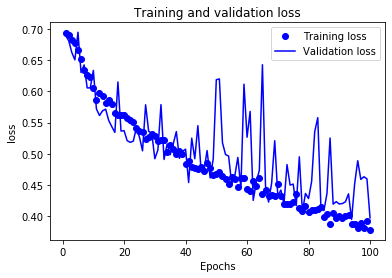

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
[u'acc', u'loss' , u'val_acc', u'val_loss']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs= range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo' , label='Training loss')
plt.plot(epochs, val_loss_values, 'b' , label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [10]:
model.save('/home/shayan/Conda files/models/cats_and_dogs_small_with_data_augmentaion.h5')